Domain: Covid Data

Covid Data Prediction
includes:-
Data Collection,
Pre Processing,
EDA,
Modelling,
Fine Tuning.


In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [182]:
from google.colab import files 
uploaded = files.upload()

Saving full_grouped - full_grouped.csv to full_grouped - full_grouped (2).csv


In [183]:
import pandas as pd
import io 
df = pd.read_csv(io.BytesIO(uploaded['full_grouped - full_grouped.csv']))
df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0,Eastern Mediterranean
1,2020-01-22,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0,Europe
2,2020-01-22,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0,Africa
3,2020-01-22,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0,Europe
4,2020-01-22,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621.0,78.0,3752.0,6791.0,152.0,2.0,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10.0,NaN,8.0,1.0,NaN,0.0,0,Africa
35153,2020-07-27,Yemen,1691.0,483.0,833.0,375.0,10.0,4.0,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552.0,140.0,2815.0,1597.0,71.0,1.0,465,Africa


In [184]:
df.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0,Eastern Mediterranean
1,2020-01-22,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0,Europe
2,2020-01-22,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0,Africa
3,2020-01-22,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0,Europe
4,2020-01-22,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0,Africa


In [185]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,3.515500e+04,35149.000000,3.515500e+04,3.515300e+04,35154.000000,35151.000000,35156.000000
mean,2.356730e+04,1234.313750,1.104845e+04,1.128539e+04,469.390425,18.605957,269.315593
std,1.499839e+05,7437.958559,6.454729e+04,8.997527e+04,3005.950966,115.714372,2068.063852
min,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.000000,-1918.000000,-16298.000000
25%,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.000000,0.000000,0.000000
75%,3.640500e+03,79.000000,1.286500e+03,1.454000e+03,75.000000,1.000000,20.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.000000,3887.000000,140050.000000


In [186]:
df.describe(include='object')

,Date,Country/Region,WHO Region
count,35156,35156,35156
unique,188,187,6
top,2020-01-22,Afghanistan,Europe
freq,187,188,10528


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            35156 non-null  object 
 1   Country/Region  35156 non-null  object 
 2   Confirmed       35155 non-null  float64
 3   Deaths          35149 non-null  float64
 4   Recovered       35155 non-null  float64
 5   Active          35153 non-null  float64
 6   New cases       35154 non-null  float64
 7   New deaths      35151 non-null  float64
 8   New recovered   35156 non-null  int64  
 9   WHO Region      35156 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 2.7+ MB


In [188]:
df.shape

(35156, 10)

Filling the missing values

In [189]:
df.isnull().sum()

Date              0
Country/Region    0
Confirmed         1
Deaths            7
Recovered         1
Active            3
New cases         2
New deaths        5
New recovered     0
WHO Region        0
dtype: int64

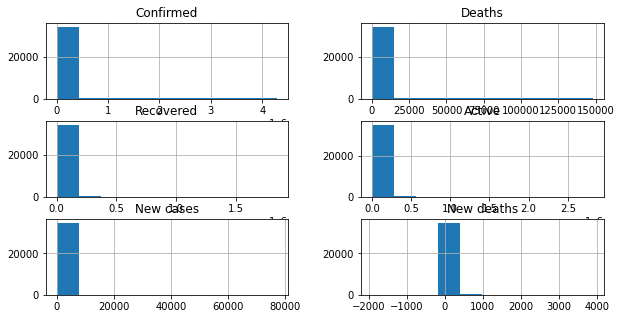

In [190]:
freqgraph = df.select_dtypes(include =['float'])
freqgraph.hist(figsize =(10,5))
plt.show()

In [191]:
df.columns

Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region'],
      dtype='object')

Filling the missing values

In [192]:
df['Confirmed'] = df['Confirmed'].fillna(df['Confirmed'].median())
df['Deaths'] = df['Deaths'].fillna(df['Deaths'].median())
df['Recovered'] = df['Recovered'].fillna(df['Recovered'].median())
df['Active'] = df['Active'].fillna(df['Active'].median())
df['New cases'] = df['New cases'].fillna(df['New cases'].median())
df['New recovered'] = df['New recovered'].fillna(df['New recovered'].median())
df['New deaths'] = df['New deaths'].fillna(df['New deaths'].median())

In [193]:
df.isna().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe0f3b2d450>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe0f3b2ded0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe0f3b28e50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe0f3b1d9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe0f3b1df10>],
 'means': []}

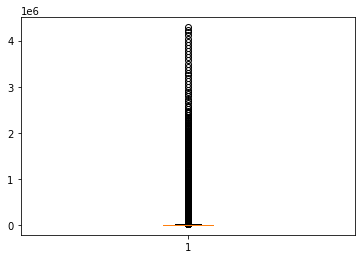

In [194]:
plt.boxplot(df['Confirmed'])

In [195]:
Q1=np.percentile(df['Confirmed'],25,interpolation='midpoint')
Q2=np.percentile(df['Confirmed'],50,interpolation='midpoint')
Q3=np.percentile(df['Confirmed'],75,interpolation='midpoint')
IQR = Q3 - Q1
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR
outlier = []
for x in df['Confirmed']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
ind1=df['Confirmed']>uplim
df.drop(df.loc[ind1].index,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe0f49bf890>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe0f4a11350>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe0f49bf2d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe0f4a11e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe0f4a0e390>],
 'means': []}

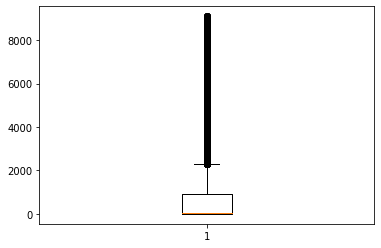

In [196]:
plt.boxplot(df['Confirmed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe0fd729ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe0fd72d590>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe0fd729510>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe0fd736090>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe0fd7365d0>],
 'means': []}

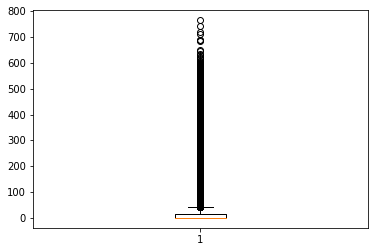

In [197]:
plt.boxplot(df['Deaths'])

In [198]:
Q1=np.percentile(df['Deaths'],25,interpolation='midpoint')
Q2=np.percentile(df['Deaths'],50,interpolation='midpoint')
Q3=np.percentile(df['Deaths'],75,interpolation='midpoint')
IQR = Q3 - Q1
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR
outlier = []
for x in df['Deaths']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
ind1=df['Deaths']>uplim
df.drop(df.loc[ind1].index,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe0fb622bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe0fb627690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe0fb622610>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe0fb62f190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe0fb62f6d0>],
 'means': []}

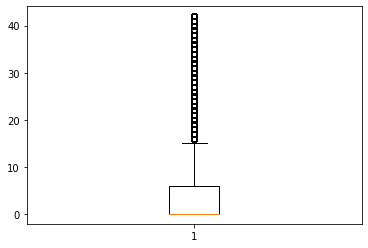

In [199]:
plt.boxplot(df['Deaths'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe0f4539ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe0f4545990>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe0f4539910>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe0f460a490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe0f460a9d0>],
 'means': []}

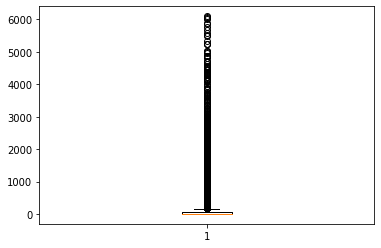

In [200]:
plt.boxplot(df['Recovered'])

In [201]:
Q1=np.percentile(df['Recovered'],25,interpolation='midpoint')
Q2=np.percentile(df['Recovered'],50,interpolation='midpoint')
Q3=np.percentile(df['Recovered'],75,interpolation='midpoint')
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR
outlier = []
for x in df['Recovered']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
ind1=df['Recovered']>uplim
df.drop(df.loc[ind1].index,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe0f4aee110>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe0f4aeeb90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe0f4afbb10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe0f4afd690>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe0f4afdbd0>],
 'means': []}

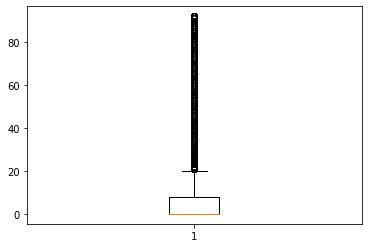

In [202]:
plt.boxplot(df['Recovered'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe0fc60ab10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe0fc62b5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe0fc60a550>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe0fc6270d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe0fc627610>],
 'means': []}

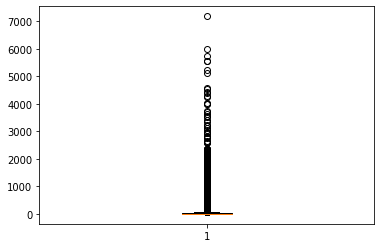

In [203]:
plt.boxplot(df['Active'])

In [204]:
Q1=np.percentile(df['Active'],25,interpolation='midpoint')
Q2=np.percentile(df['Active'],50,interpolation='midpoint')
Q3=np.percentile(df['Active'],75,interpolation='midpoint')
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR
outlier = []
for x in df['Active']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
ind1=df['Active']>uplim
df.drop(df.loc[ind1].index,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe0fcb4d310>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe0fcb4dd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe0fcb7cd10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe0fc4aa890>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe0fc4aadd0>],
 'means': []}

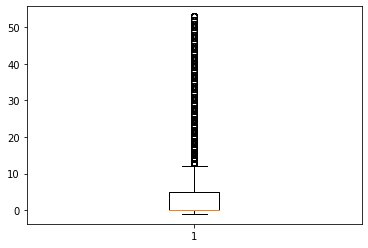

In [205]:
plt.boxplot(df['Active'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe0fbdf4290>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe0fbdf4d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe0fbddbc90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe0fbdfd810>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe0fbdfdd50>],
 'means': []}

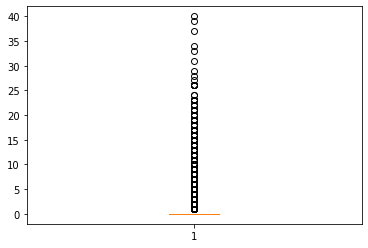

In [206]:
plt.boxplot(df['New cases'])

In [207]:
Q1=np.percentile(df['New cases'],25,interpolation='midpoint')
Q2=np.percentile(df['New cases'],50,interpolation='midpoint')
Q3=np.percentile(df['New cases'],75,interpolation='midpoint')
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR
outlier = []
for x in df['New cases']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
ind1=df['New cases']>uplim
df.drop(df.loc[ind1].index,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe0fc3a6f90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe0fc39aa50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe0fc3a69d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe0fc3ab550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe0fc3aba90>],
 'means': []}

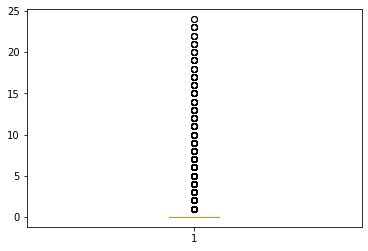

In [208]:
plt.boxplot(df['New cases'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe0fc0c5f90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe0fbfcaa50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe0fc0c59d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe0fbfd1550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe0fbfd1a90>],
 'means': []}

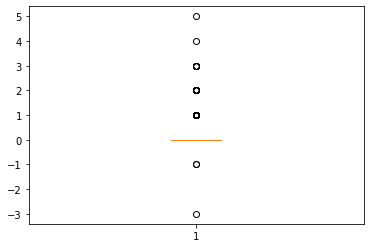

In [209]:
plt.boxplot(df['New deaths'])

In [210]:
Q1=np.percentile(df['New deaths'],25,interpolation='midpoint')
Q2=np.percentile(df['New deaths'],50,interpolation='midpoint')
Q3=np.percentile(df['New deaths'],75,interpolation='midpoint')
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR
outlier = []
for x in df['New deaths']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
ind1=df['New deaths']>uplim
df.drop(df.loc[ind1].index,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe0fbfb9990>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe0fbfbd450>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe0fbfb93d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe0fbfbdf10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe0fbfc4490>],
 'means': []}

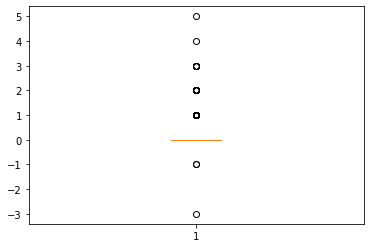

In [211]:
plt.boxplot(df['New deaths'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe0fbee68d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe0fbeea390>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe0fbee6310>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe0fbeeae50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe0fbef23d0>],
 'means': []}

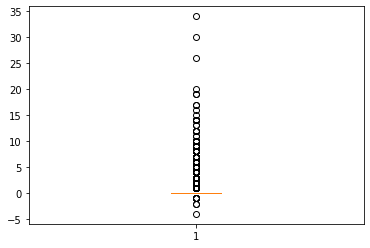

In [212]:
plt.boxplot(df['New recovered'])

In [213]:
Q1=np.percentile(df['New recovered'],25,interpolation='midpoint')
Q2=np.percentile(df['New recovered'],50,interpolation='midpoint')
Q3=np.percentile(df['New recovered'],75,interpolation='midpoint')
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR
outlier = []
for x in df['New recovered']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
ind1=df['New recovered']>uplim
df.drop(df.loc[ind1].index,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe0fbd165d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe0fbd1c090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe0fbd0ffd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe0fbd1cb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe0fbd240d0>],
 'means': []}

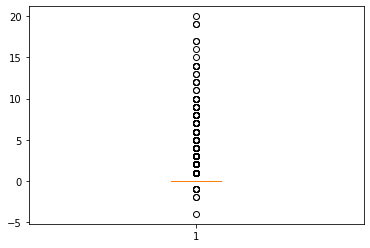

In [214]:
plt.boxplot(df['New recovered'])

label encoding

In [215]:
#before encoding copy dataset to a new dataframe
data = df.copy()

In [216]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Country/Region']= le.fit_transform(df['Country/Region'])
df['WHO Region']= le.fit_transform(df['WHO Region'])
df.drop('Country/Region',axis=1)
df.drop('WHO Region',axis=1)
df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
1,2020-01-22,1,0.0,0.0,0.0,0.0,0.0,0.0,0,3
2,2020-01-22,2,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,2020-01-22,3,0.0,0.0,0.0,0.0,0.0,0.0,0,3
4,2020-01-22,4,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
35109,2020-07-27,139,17.0,0.0,15.0,2.0,0.0,0.0,0,1
35110,2020-07-27,140,24.0,0.0,22.0,2.0,0.0,0.0,0,1
35111,2020-07-27,141,52.0,0.0,39.0,13.0,0.0,0.0,0,1
35137,2020-07-27,167,24.0,0.0,0.0,24.0,0.0,0.0,0,4


Feature reduction and feature engineering

In [217]:
df[['year','month','date']]=df['Date'].str.split('-',expand=True)

In [218]:
df.drop('Date',axis=1)
df.drop('Country/Region',axis=1)

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,year,month,date
0,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0,2,2020,01,22
1,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0,3,2020,01,22
2,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2020,01,22
3,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0,3,2020,01,22
4,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2020,01,22
...,...,...,...,...,...,...,...,...,...,...,...,...
35109,2020-07-27,17.0,0.0,15.0,2.0,0.0,0.0,0,1,2020,07,27
35110,2020-07-27,24.0,0.0,22.0,2.0,0.0,0.0,0,1,2020,07,27
35111,2020-07-27,52.0,0.0,39.0,13.0,0.0,0.0,0,1,2020,07,27
35137,2020-07-27,24.0,0.0,0.0,24.0,0.0,0.0,0,4,2020,07,27


In [219]:
df["IFR"]=(df["Deaths"]/df["Confirmed"])*100
df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,year,month,date,IFR
0,2020-01-22,0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,2020,01,22,NaN
1,2020-01-22,1,0.0,0.0,0.0,0.0,0.0,0.0,0,3,2020,01,22,NaN
2,2020-01-22,2,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2020,01,22,NaN
3,2020-01-22,3,0.0,0.0,0.0,0.0,0.0,0.0,0,3,2020,01,22,NaN
4,2020-01-22,4,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2020,01,22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35109,2020-07-27,139,17.0,0.0,15.0,2.0,0.0,0.0,0,1,2020,07,27,0.0
35110,2020-07-27,140,24.0,0.0,22.0,2.0,0.0,0.0,0,1,2020,07,27,0.0
35111,2020-07-27,141,52.0,0.0,39.0,13.0,0.0,0.0,0,1,2020,07,27,0.0
35137,2020-07-27,167,24.0,0.0,0.0,24.0,0.0,0.0,0,4,2020,07,27,0.0


In [220]:
df.drop('Date',axis=1)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,year,month,date,IFR
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,2020,01,22,NaN
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0,3,2020,01,22,NaN
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2020,01,22,NaN
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0,3,2020,01,22,NaN
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2020,01,22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35109,139,17.0,0.0,15.0,2.0,0.0,0.0,0,1,2020,07,27,0.0
35110,140,24.0,0.0,22.0,2.0,0.0,0.0,0,1,2020,07,27,0.0
35111,141,52.0,0.0,39.0,13.0,0.0,0.0,0,1,2020,07,27,0.0
35137,167,24.0,0.0,0.0,24.0,0.0,0.0,0,4,2020,07,27,0.0


In [221]:
df.isna().sum()

Date                 0
Country/Region       0
Confirmed            0
Deaths               0
Recovered            0
Active               0
New cases            0
New deaths           0
New recovered        0
WHO Region           0
year                 0
month                0
date                 0
IFR               8012
dtype: int64

In [222]:
df['IFR'] = df['IFR'].fillna('0')
df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,year,month,date,IFR
0,2020-01-22,0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,2020,01,22,0
1,2020-01-22,1,0.0,0.0,0.0,0.0,0.0,0.0,0,3,2020,01,22,0
2,2020-01-22,2,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2020,01,22,0
3,2020-01-22,3,0.0,0.0,0.0,0.0,0.0,0.0,0,3,2020,01,22,0
4,2020-01-22,4,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2020,01,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35109,2020-07-27,139,17.0,0.0,15.0,2.0,0.0,0.0,0,1,2020,07,27,0.0
35110,2020-07-27,140,24.0,0.0,22.0,2.0,0.0,0.0,0,1,2020,07,27,0.0
35111,2020-07-27,141,52.0,0.0,39.0,13.0,0.0,0.0,0,1,2020,07,27,0.0
35137,2020-07-27,167,24.0,0.0,0.0,24.0,0.0,0.0,0,4,2020,07,27,0.0


In [223]:
df.isna().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
year              0
month             0
date              0
IFR               0
dtype: int64

In [224]:
df=df.drop('Date',axis=1)

Standardization/ normalization

In [225]:
X = df.drop(['New cases','IFR'],axis=1)

min_max = preprocessing.MinMaxScaler(feature_range=(0,2))
X = min_max.fit_transform(X)

pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,15134.000000,15134.000000,15134.000000,15134.000000,15134.000000,15134.000000,15134.000000,15134.000000,15134.0,15134.000000,15134.000000
mean,0.990072,0.086116,0.062706,0.105162,0.242163,0.754179,0.345183,0.694569,0.0,0.643408,0.987150
std,0.584805,0.166550,0.222687,0.299889,0.406569,0.040070,0.074577,0.645061,0.0,0.492820,0.598075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.497297,0.000000,0.000000,0.000000,0.037037,0.750000,0.333333,0.000000,0.0,0.333333,0.466667
50%,1.005405,0.000000,0.000000,0.000000,0.037037,0.750000,0.333333,0.400000,0.0,0.666667,1.000000
75%,1.502703,0.104000,0.000000,0.021739,0.222222,0.750000,0.333333,1.200000,0.0,1.000000,1.533333
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.0,2.000000,2.000000


In [226]:
X = df.drop(['New cases','IFR'],axis=1)
y = df['New cases']

from sklearn.model_selection import train_test_split
from sklearn import linear_model

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

pred=model.predict(x_test)
print('MSE is ', mean_squared_error(y_test, pred))
print('R squared value is ', r2_score(y_test,pred)) 

MSE is  3.0494642238641436
R squared value is  0.3265086544448763


EDA

In [227]:
import plotly.graph_objects as go

In [228]:
casesInMonths =df.groupby(['month'])[['New cases','New deaths','New recovered']].sum()
casesInMonths.set_axis(['Active', 'Deaths', 'Recovered'],axis = 'columns',inplace=True)
casesInMonths = casesInMonths.sort_values('Active',ascending=False)
casesInMonths

,Active,Deaths,Recovered
month,,,
03,5288.0,99.0,324
04,1850.0,107.0,844
02,799.0,19.0,232
05,590.0,25.0,433
06,291.0,1.0,198
07,288.0,2.0,113
01,118.0,0.0,8


In [229]:
anchos = [0.2] * 6
graph= go.Figure()
graph.add_trace(go.Bar(x = casesInMonths.index,
                     y = casesInMonths['Recovered'], 
                     width = anchos, name = 'Recovered Case'))
graph.add_trace(go.Bar(x = casesInMonths.index,
                     y = casesInMonths['Active'], 
                     width = anchos, name = 'Active Case'))
graph.add_trace(go.Bar(x = casesInMonths.index,
                     y = casesInMonths['Deaths'], 
                     width = anchos, name = 'Death Case'))


graph.update_layout(title =  "Stats of Covid Cases per Month of 2020",
                  barmode = 'group', title_font_size =15)
graph.update_xaxes(title_text = 'Months')
graph.update_yaxes(title_text = "No. of cases")
graph.show()

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

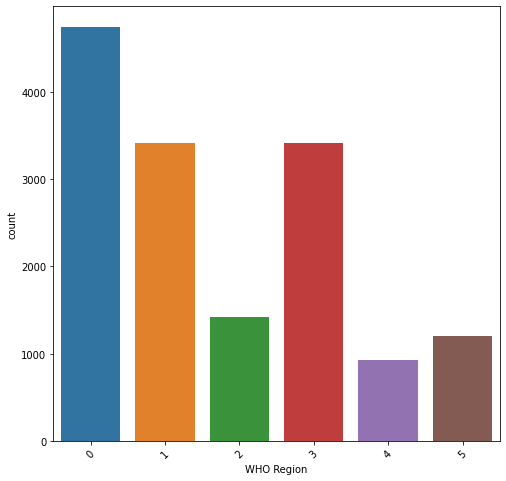

In [230]:
plt.figure(figsize=(8,8))
sns.countplot(df['WHO Region'])
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

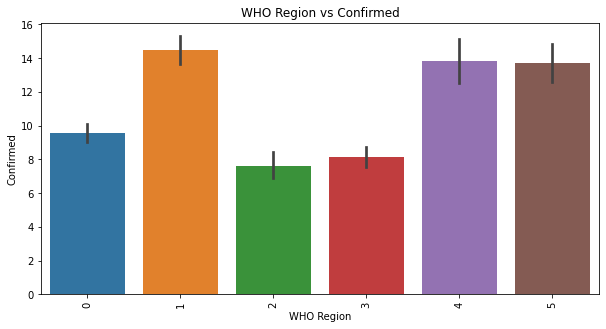

In [231]:
plt.figure(figsize=(10,5))
sns.barplot(x = df['WHO Region'],y = df['Confirmed'])
plt.title('WHO Region vs Confirmed')
plt.xticks(rotation=90)

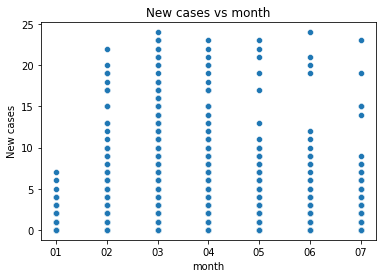

In [232]:
sns.scatterplot(data = df, y="New cases", x="month" )
plt.title("New cases vs month")
plt.show()

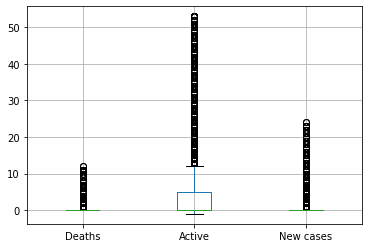

In [233]:
df[['Deaths', 'Active', 'New cases']].boxplot()

<Figure size 720x720 with 0 Axes>

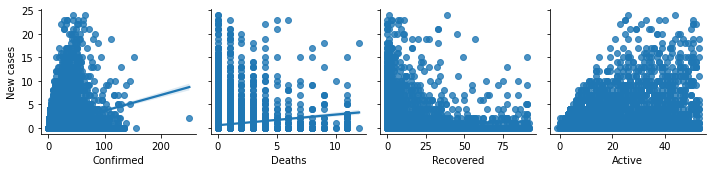

In [234]:
plt.figure(figsize=(10,10))
sns.pairplot(df,x_vars=['Confirmed', 'Deaths', 'Recovered', 'Active'],
             y_vars='New cases',kind='reg')
plt.tight_layout()
plt.show()

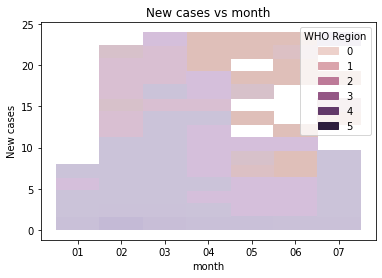

In [235]:
sns.histplot(data = df, y="New cases", x="month", hue = 'WHO Region' )
plt.title("New cases vs month") 
plt.show()

MODELLING

In [236]:
#TARGET AND PREDICTOR VARIABLES
X = data.drop(['New cases'],axis =1)
y = data['New cases']

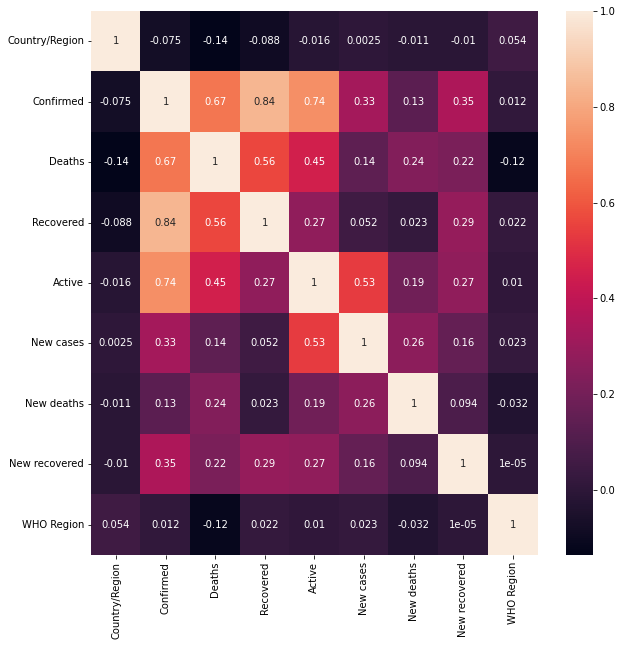

In [237]:
corr = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot =True)

LINEAR REGRESSION

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [241]:
X = df.drop(['New cases','IFR'],axis=1)
y = df['New cases']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [242]:
print("Root Mean squared error is  ", mean_squared_error)
print("R2 score ", lr_model.score(X_test,y_test))

Root Mean squared error is   <function mean_squared_error at 0x7fe0f3fc1950>
R2 score  0.3265086544448763


RANDOM FOREST REGRESSOR


In [244]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf= rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)

In [245]:
print("Root Mean squared error is  ", mean_squared_error(y_test,y_pred))
print("R2 score ", rf.score(X_test,y_test))

Root Mean squared error is   2.748899273207796
R2 score  0.39289011629647497


GRADIENT BOOST REGRESSOR

In [246]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb = gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

In [247]:
print("Root Mean squared error is  ", mean_squared_error(y_test,y_pred)
print("R2 score ", gb.score(X_test,y_test))

SyntaxError: ignored

In [248]:
print("R2 score ", rf.score(X_test,y_test))

R2 score  0.39289011629647497


Model fine tuning

In [249]:
gb_hypertuned= GradientBoostingRegressor(learning_rate = .1, max_depth =5, n_estimators = 300)
gb_hypertuned = gb_hypertuned.fit(X_train,y_train)
y_pred = gb_hypertuned.predict(X_test)

In [250]:
print("Root Mean squared error is  ", mean_squared_error(y_test,y_pred)
print("R2 score ", rf_model.score(X_test,y_test))

SyntaxError: ignored